# Experimentation with the kNN-VC model with different number of speakers
## ASV evaluation with the anonymized audiofiles by increasing the number of speakers
1. The number of speakers is slowly increased by 10, 25 or 50 for both ignorant and lazy-informed scenario
2. We run the experiments multiple times for different target selections (i.e. different seeds)
3. The added speakers are randomly sampled 10 times for smaller datasets and 5 times for larger ones from the entire speaker population to avoid any bias (Srivastava et al., 2022) 

<b> Hypothesis</b>: The EER of the ASV system will increase, as the number of source speakers
increases. A larger population of speakers will escalate the system’s task com-plexity due to the necessity of detecting a greater number of non-matching speaker pairs, thereby leading to a higher error rate <br>

The following datasets from librispeech are evaluated:
1. ls-test-clean
2. ls-test-other
4. ls-train-other-500

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt



/tmp/ipykernel_3359278/2862603903.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 1. Evaluation with ls-test-clean and ls-test-other (73 speakers)
The speakers are increased by 10. We run the experiments for 4 different target selections (seeds).

In [15]:
file_pattern = "results_speakers/results_knnvc_speakers/ls-test-clean-other/knnvc_tco_speakers#*.txt" 

##### Individual Evaluation

In [16]:
all_files = glob.glob(file_pattern)

# Initialize an empty list to store dataframes
dfs = []

for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100

    # Calculating mean and standard deviation for EER in both scenarios
    eer_ignorant_stats = df.groupby('num_of_speakers')['eer_ignorant'].agg(['mean', 'std'])
    eer_lazy_informed_stats = df.groupby('num_of_speakers')['eer_lazy-informed'].agg(['mean', 'std'])
    
     # Enhancing clarity by specifying scenario names
    eer_ignorant_stats.columns = pd.MultiIndex.from_product([['Ignorant'], eer_ignorant_stats.columns])
    eer_lazy_informed_stats.columns = pd.MultiIndex.from_product([['Lazy-Informed'], eer_lazy_informed_stats.columns])

    # Combining both stats into a single DataFrame for a unified table
    combined_stats = pd.concat([eer_ignorant_stats, eer_lazy_informed_stats], axis=1)

    print(f"\nStatistics for seed: {df['file'].iloc[0]}")
    display(combined_stats)
    



Statistics for seed: 17117123511


Ignorant           Lazy-Informed          
                      mean       std          mean       std
num_of_speakers                                             
10               45.333333  6.719696      7.888889  3.544253
20               44.973684  5.279088     11.605263  4.405832
30               44.816092  2.430294     11.137931  3.445737
40               45.641026  3.335336     13.480769  3.213978
50               46.057143  1.322474     13.195918  2.280177
60               45.536723  2.262247     11.918079  1.809961
70               45.772257  1.402178     12.105590  0.556826


Statistics for seed: 1712506146


Ignorant            Lazy-Informed          
                      mean        std          mean       std
num_of_speakers                                              
10               42.444444  13.469215     11.888889  4.707493
20               41.210526   2.595810     11.368421  2.923896
30               41.827586   4.643877     11.402299  2.703777
40               40.884615   2.899764      9.948718  2.737206
50               41.820408   0.720440      9.885714  1.251621
60               41.211864   0.559686      8.991525  2.029396
70               41.461698   0.966521      8.703934  0.677299


Statistics for seed: 1712444243


Ignorant           Lazy-Informed          
                      mean       std          mean       std
num_of_speakers                                             
10               39.000000  5.643744     10.444444  1.730268
20               46.421053  4.894489      9.131579  3.058468
30               40.747126  3.804190     10.195402  3.517880
40               41.512821  2.581710     11.378205  1.487711
50               42.110204  1.154875     10.355102  1.460332
60               42.703390  0.690908     10.742938  0.782759
70               43.134576  1.102822     11.182195  0.765220


Statistics for seed: 1712524706


Ignorant           Lazy-Informed          
                      mean       std          mean       std
num_of_speakers                                             
10               45.777778  5.508131     12.555556  4.804833
20               46.184211  4.508379     12.657895  2.237616
30               46.356322  4.797147     12.816092  3.811563
40               46.173077  2.818564     10.512821  2.125196
50               45.510204  2.419293     12.836735  2.562545
60               46.254237  1.609748     13.158192  0.654277
70               46.031056  0.550049     12.492754  0.536827


Statistics for seed: 1712514147


Ignorant           Lazy-Informed          
                      mean       std          mean       std
num_of_speakers                                             
10               44.222222  4.454849      4.777778  3.108133
20               49.078947  4.373887      8.105263  2.707139
30               45.379310  3.593586      9.310345  2.035570
40               46.064103  1.961214      7.923077  2.891143
50               44.608163  1.414611      8.840816  1.887363
60               47.096045  1.060291      7.333333  1.411419
70               47.136646  0.141106      7.815735  0.919520

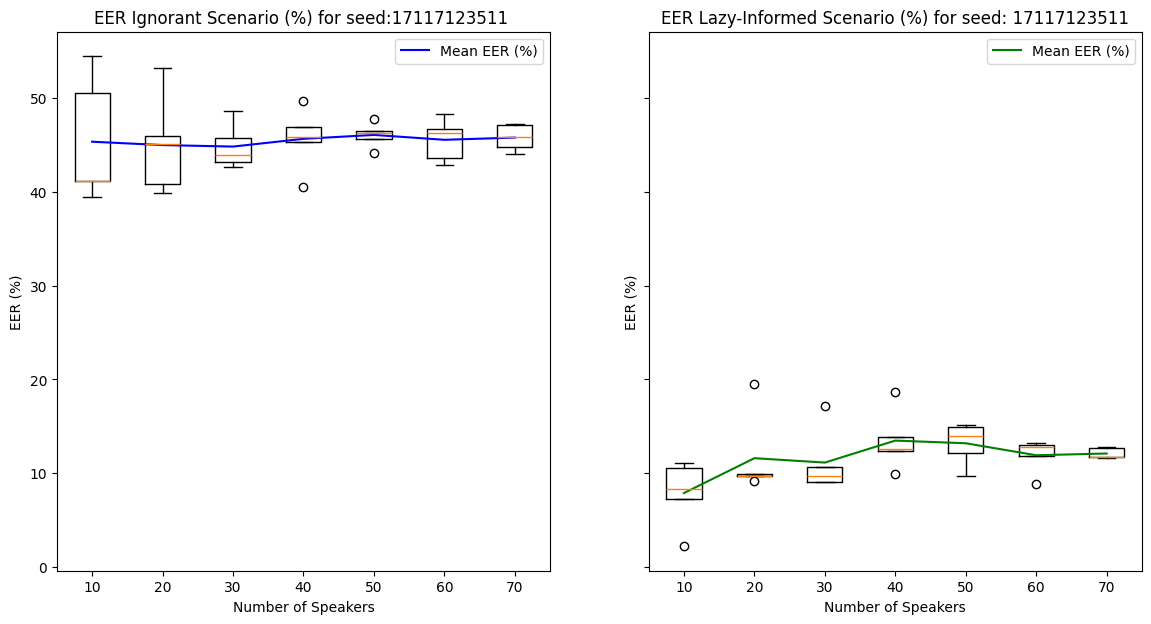

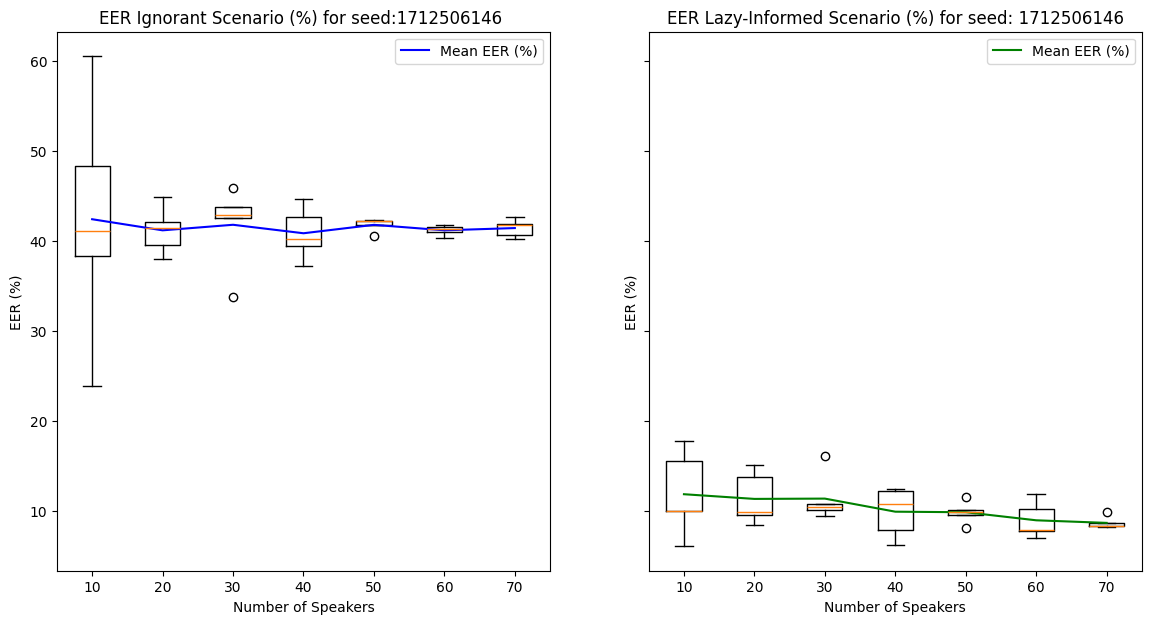

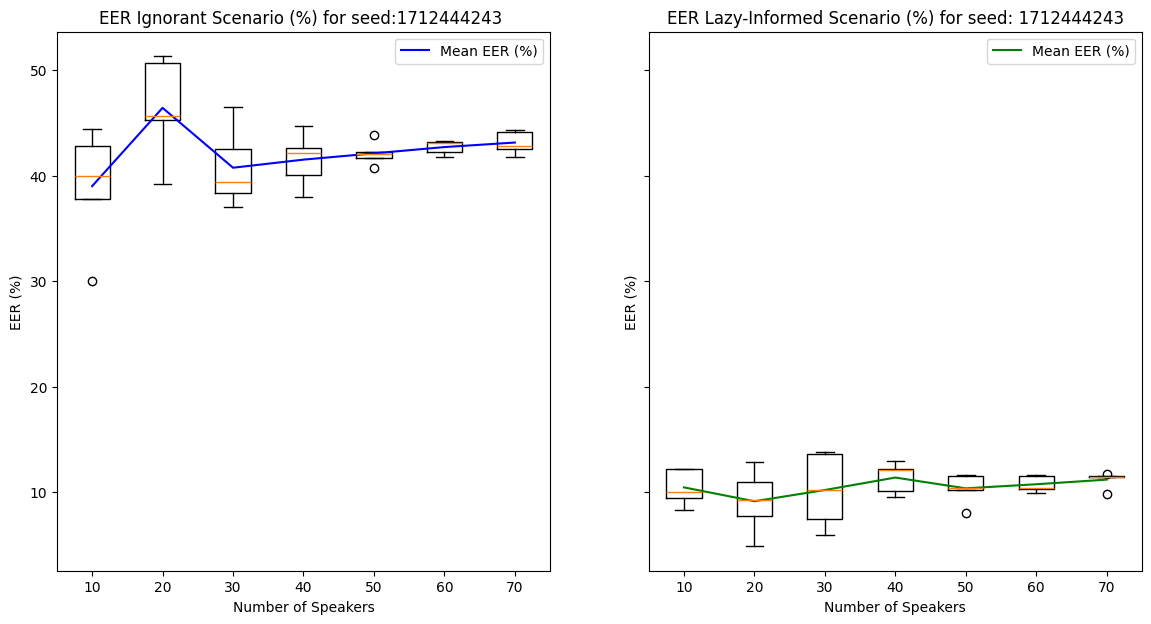

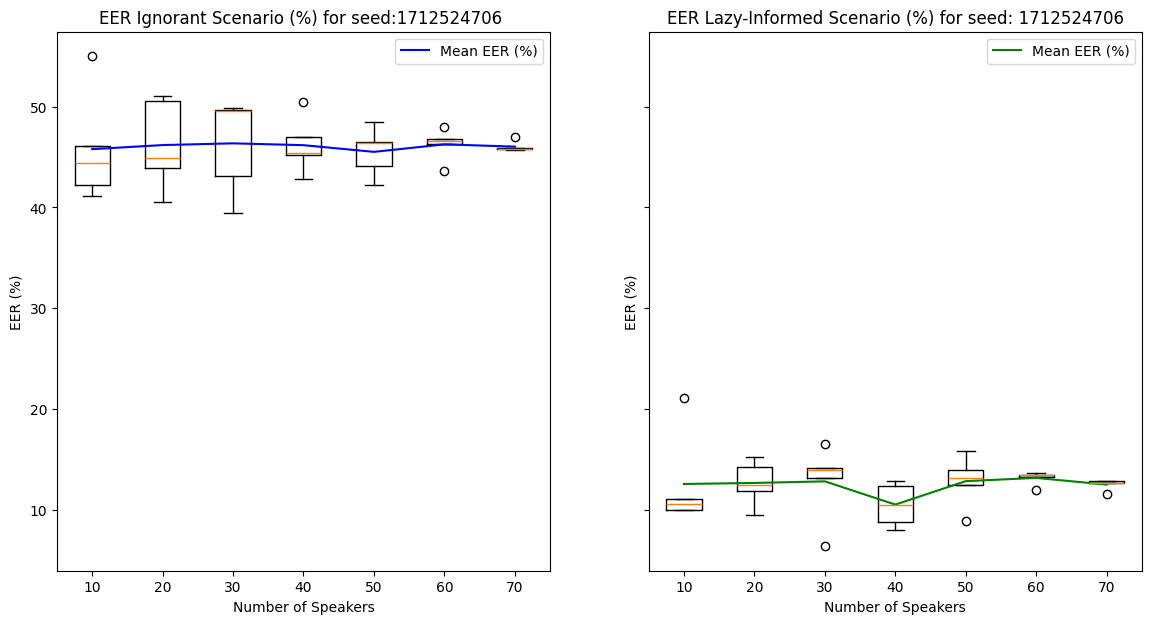

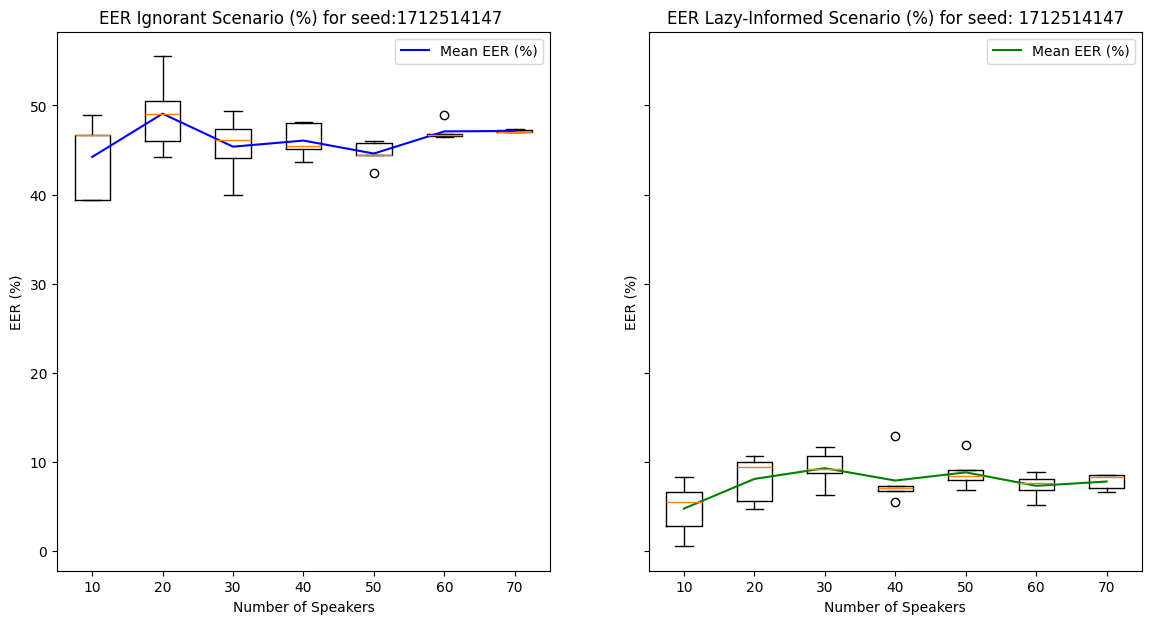

In [17]:
for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100
    # Adjusting EER values to percentages by multiplying by 100
    # Recalculating groups for plotting
    groups_ig_percent = df.groupby('num_of_speakers')['eer_ignorant'].apply(list)
    groups_lz_percent = df.groupby('num_of_speakers')['eer_lazy-informed'].apply(list)
    
    # Recalculating means for both scenarios across different numbers of speakers
    mean_ignorant_percent =df.groupby('num_of_speakers')['eer_ignorant'].mean()
    mean_lazy_informed_percent = df.groupby('num_of_speakers')['eer_lazy-informed'].mean()
    
    # Plotting updated data with mean lines reflecting EER percentages
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), sharey=True)
    
    # Ignorant scenario with mean line
    axs[0].boxplot(groups_ig_percent, labels=groups_ig_percent.index)
    axs[0].plot(range(1, len(mean_ignorant_percent) + 1), mean_ignorant_percent, color='blue', label='Mean EER (%)')
    axs[0].set_title(f"EER Ignorant Scenario (%) for seed:{df['file'].iloc[0]} ")
    axs[0].set_xlabel('Number of Speakers')
    axs[0].set_ylabel('EER (%)')
    axs[0].legend()

    # Lazy-informed scenario with mean line
    axs[1].boxplot(groups_lz_percent, labels=groups_lz_percent.index)
    axs[1].plot(range(1, len(mean_ignorant_percent) + 1), mean_lazy_informed_percent, color='green', label='Mean EER (%)')
    axs[1].set_title(f"EER Lazy-Informed Scenario (%) for seed: {df['file'].iloc[0]}")
    axs[1].set_xlabel('Number of Speakers')
    axs[1].set_ylabel('EER (%)')
    axs[1].legend()




##### Averaging over all target selections


In [18]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)



In [19]:
# Aggregate and calculate overall mean and standard deviation for each number of speakers
overall_stats = full_df.groupby('num_of_speakers').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

# Display the overall statistics in a table
print("Overall Statistics Across All Files:")
display(overall_stats)

Overall Statistics Across All Files:


eer_ignorant           eer_lazy-informed          
                        mean       std              mean       std
num_of_speakers                                                   
10                 43.355556  7.599613          9.511111  4.500000
20                 45.573684  4.812967         10.573684  3.352011
30                 43.825287  4.222087         10.972414  3.134552
40                 44.055128  3.474413         10.648718  2.986727
50                 44.021224  2.253089         11.022857  2.488906
60                 44.560452  2.606565         10.428814  2.489801
70                 44.707246  2.297949         10.460041  2.011838

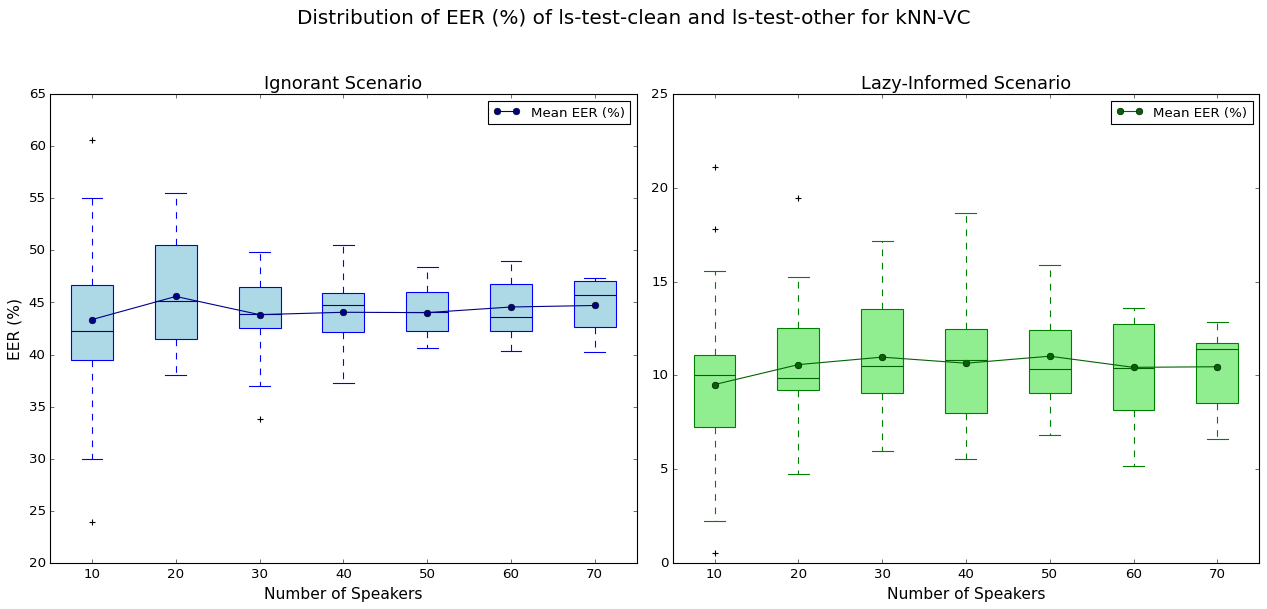

In [28]:
# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 8), facecolor='white')

# Customizing the overall appearance
plt.suptitle('Distribution of EER (%) of ls-test-clean and ls-test-other for kNN-VC', fontsize=18, fontweight='normal')

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_speakers')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_speakers')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index, patch_artist=True, 
               boxprops=dict(facecolor='lightblue', color='blue'),
               medianprops=dict(color='darkblue'),
               whiskerprops=dict(color='blue'),
               capprops=dict(color='blue'))
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='darkblue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario', fontsize=16, fontweight='normal')
axs[0].set_xlabel('Number of Speakers', fontsize=14)
axs[0].set_ylabel('EER (%)', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_speakers')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_speakers')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index, patch_artist=True, 
               boxprops=dict(facecolor='lightgreen', color='green'),
               medianprops=dict(color='darkgreen'),
               whiskerprops=dict(color='green'),
               capprops=dict(color='green'))
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='darkgreen', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Lazy-Informed Scenario', fontsize=16, fontweight='normal')
axs[1].set_xlabel('Number of Speakers', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure
plt.savefig('overal_stats/knnvc_tco_speakers.png', dpi=300, bbox_inches='tight')  # Save as high-resolution PNG
plt.savefig('overal_stats/knnvc_tco_speakers.pdf', bbox_inches='tight')  # Save as PDF

plt.show()



### 3. Evaluation with ls-train-other-500 (1166 speakers)
The speakers are increased by 50. We run the experiments for 5 different target selections (seeds).

In [29]:
file_pattern = "results_speakers/results_knnvc_speakers/ls-train-other-500/knnvc_to500_speakers#*.txt" 

Individual Evaluation for different target selections

In [30]:
all_files = glob.glob(file_pattern)

# Initialize an empty list to store dataframes
dfs = []

for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)


    # Calculating mean and standard deviation for EER in both scenarios
    eer_ignorant_stats = df.groupby('num_of_speakers')['eer_ignorant'].agg(['mean', 'std'])
    eer_lazy_informed_stats = df.groupby('num_of_speakers')['eer_lazy-informed'].agg(['mean', 'std'])
    
     # Enhancing clarity by specifying scenario names
    eer_ignorant_stats.columns = pd.MultiIndex.from_product([['Ignorant'], eer_ignorant_stats.columns])
    eer_lazy_informed_stats.columns = pd.MultiIndex.from_product([['Lazy-Informed'], eer_lazy_informed_stats.columns])

    # Combining both stats into a single DataFrame for a unified table
    combined_stats = pd.concat([eer_ignorant_stats, eer_lazy_informed_stats], axis=1)

    print(f"\nStatistics for seed: {df['file'].iloc[0]}")
    display(combined_stats)


Statistics for seed: 1712601353


Ignorant           Lazy-Informed          
                      mean       std          mean       std
num_of_speakers                                             
50               39.387755  5.733187      4.293878  1.537711
100              40.793939  1.713984      5.334343  1.226656
150              40.021924  1.860989      4.408501  0.436129
200              39.362060  1.337835      5.034171  0.718022
250              40.445301  1.376439      4.971566  0.520682
300              40.603344  1.174134      5.375474  0.912066
350              40.274580  1.360780      5.103316  0.325072
400              40.628634  1.096282      5.380201  0.471052
450              40.439000  0.601811      5.212324  0.320106
500              40.467255  0.790445      5.069820  0.461615
550              40.444743  0.681309      5.066369  0.354243
600              40.202977  0.681112      4.846578  0.303972
650              40.660567  0.705222      5.057272  0.221882
700              40.207439  0.897879      5.051952  0.216539
750              40.474962  0.520829      4.962421  0.331888
800              40.383933  0.388904      4.863611  0.259765
850              40.733125  0.424658      5.700756  1.147341
900              40.499283  0.319961      4.860190  0.118270
950              40.466874  0.172395      4.970429  0.231141
1000             40.311792  0.213393      5.072623  0.111353


Statistics for seed: 1712601441


Ignorant           Lazy-Informed          
                      mean       std          mean       std
num_of_speakers                                             
50               39.906122  2.162957      3.963265  1.598456
100              40.257576  1.478164      4.125253  1.054446
150              40.875615  0.544201      4.936913  1.434242
200              42.822864  1.335739      4.883166  0.557102
250              41.595020  0.681418      5.169639  0.980160
300              41.024415  1.993214      5.024749  0.047233
350              41.310356  1.256039      5.248629  0.543061
400              41.525439  0.923820      4.667043  0.340692
450              41.408612  0.524479      5.364563  0.431095
500              41.137715  0.416904      5.047535  0.445841
550              41.413876  0.388585      5.137639  0.460997
600              41.349332  0.827688      5.161797  0.527779
650              41.023302  0.930350      5.161100  0.266397
700              41.012957  0.811639      5.258492  0.250566
750              41.041371  0.514467      5.007850  0.287524
800              41.531555  0.505813      5.232009  0.150907
850              41.401400  0.608810      5.305296  0.090564
900              41.309838  0.234204      5.162155  0.166795
950              41.036352  0.417289      5.261184  0.070108
1000             41.530313  0.346427      5.277097  0.097567


Statistics for seed: 1712611492


Ignorant           Lazy-Informed          
                      mean       std          mean       std
num_of_speakers                                             
50               38.657143  1.471187      4.048980  1.175163
100              39.143434  1.915972      4.206061  0.660462
150              40.401342  2.246244      4.768680  0.847414
200              40.379648  1.765345      5.552764  0.854155
250              40.067149  1.162894      5.687711  0.347711
300              39.929766  1.177750      4.776477  0.512069
350              40.160377  1.066546      4.984855  0.418083
400              40.102694  0.932980      4.999749  0.671229
450              40.710765  0.765754      5.068547  0.422184
500              39.531864  0.593888      5.166533  0.270526
550              40.823282  0.537209      4.977215  0.424844
600              39.988091  0.628464      4.683862  0.318469
650              40.051843  0.834204      5.227925  0.311553
700              39.861455  0.751190      5.143491  0.409497
750              40.420863  0.718462      4.845895  0.203322
800              40.161874  0.187065      5.241787  0.062432
850              40.151680  0.110842      5.191284  0.371694
900              40.087023  0.178845      5.140754  0.247439
950              40.217082  0.324243      5.100487  0.289518
1000             40.379760  0.135707      5.073316  0.220824


Statistics for seed: 1712601399


Ignorant           Lazy-Informed          
                      mean       std          mean       std
num_of_speakers                                             
50               42.355102  3.363591      4.318367  0.959791
100              40.919192  3.756496      4.934343  1.532656
150              42.641611  2.940795      4.765996  0.658326
200              41.352261  0.938745      5.410302  0.569627
250              41.648353  1.588476      5.575582  0.900388
300              41.069900  0.923547      5.218060  0.471496
350              41.325665  1.095199      5.466885  0.576926
400              41.907707  1.437338      5.139223  0.577965
450              41.446276  1.215486      5.238060  0.185122
500              40.838300  1.475611      5.286333  0.434514
550              41.555986  0.535273      5.381851  0.280264
600              41.715832  0.453934      5.002504  0.355483
650              41.474434  0.712982      5.067631  0.248505
700              41.419088  0.325229      5.042959  0.512113
750              41.597116  0.355824      5.026133  0.222454
800              41.752049  0.458448      5.374812  0.245371
850              41.785699  0.295483      5.203581  0.441769
900              42.205013  2.201987      5.380752  0.182071
950              41.596384  0.401876      5.292572  0.276598
1000             41.657758  0.156657      5.401398  0.140703

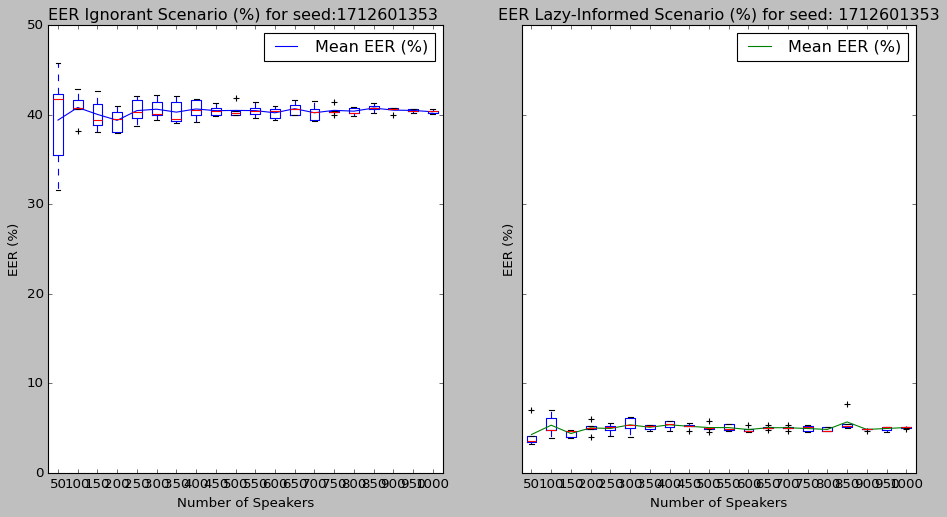

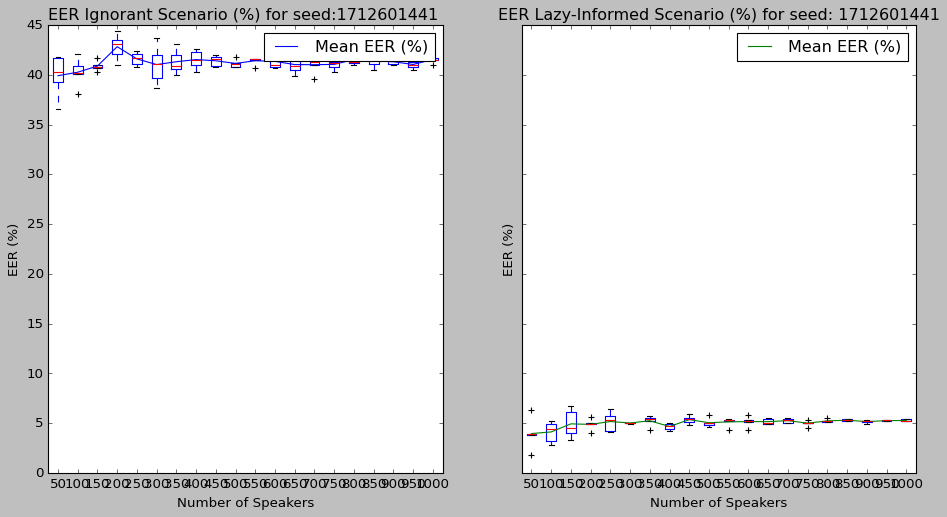

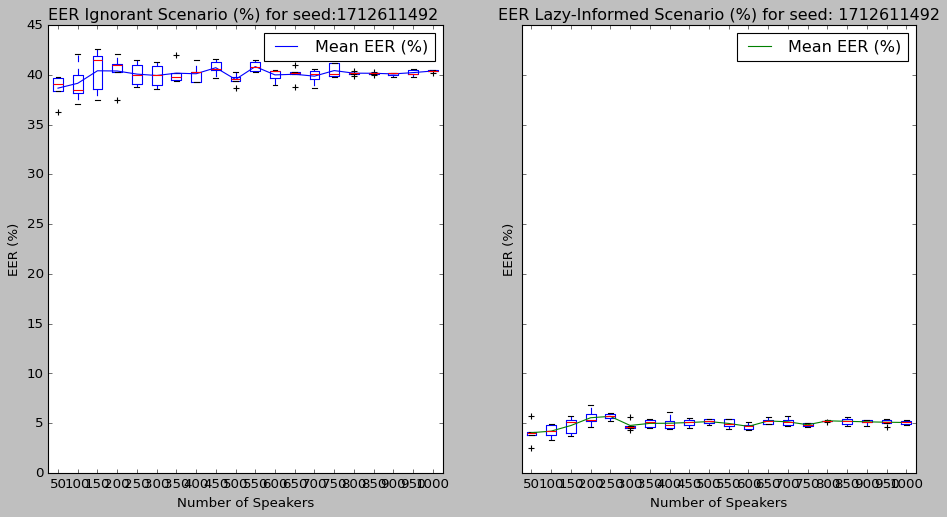

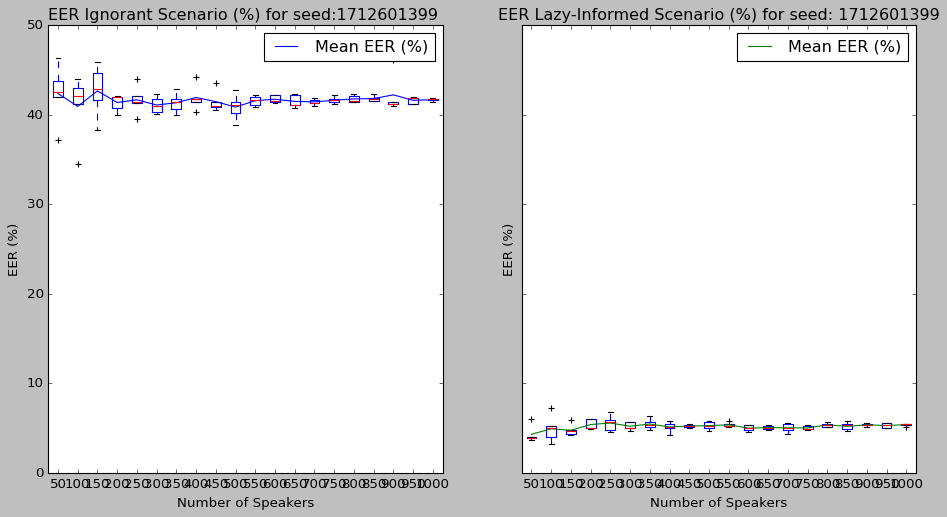

In [31]:
for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100
    # Adjusting EER values to percentages by multiplying by 100
    # Recalculating groups for plotting
    groups_ig_percent = df.groupby('num_of_speakers')['eer_ignorant'].apply(list)
    groups_lz_percent = df.groupby('num_of_speakers')['eer_lazy-informed'].apply(list)
    
    # Recalculating means for both scenarios across different numbers of speakers
    mean_ignorant_percent =df.groupby('num_of_speakers')['eer_ignorant'].mean()
    mean_lazy_informed_percent = df.groupby('num_of_speakers')['eer_lazy-informed'].mean()
    
    # Plotting updated data with mean lines reflecting EER percentages
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), sharey=True)
    
    # Ignorant scenario with mean line
    axs[0].boxplot(groups_ig_percent, labels=groups_ig_percent.index)
    axs[0].plot(range(1, len(mean_ignorant_percent) + 1), mean_ignorant_percent, color='blue', label='Mean EER (%)')
    axs[0].set_title(f"EER Ignorant Scenario (%) for seed:{df['file'].iloc[0]} ")
    axs[0].set_xlabel('Number of Speakers')
    axs[0].set_ylabel('EER (%)')
    axs[0].legend()

    # Lazy-informed scenario with mean line
    axs[1].boxplot(groups_lz_percent, labels=groups_lz_percent.index)
    axs[1].plot(range(1, len(mean_ignorant_percent) + 1), mean_lazy_informed_percent, color='green', label='Mean EER (%)')
    axs[1].set_title(f"EER Lazy-Informed Scenario (%) for seed: {df['file'].iloc[0]}")
    axs[1].set_xlabel('Number of Speakers')
    axs[1].set_ylabel('EER (%)')
    axs[1].legend()


Averaging over all target selections

In [32]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)



In [33]:
# Aggregate and calculate overall mean and standard deviation for each number of speakers
overall_stats = full_df.groupby('num_of_speakers').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

# Display the overall statistics in a table
print("Overall Statistics for ls-train-other-500:")
display(overall_stats)

Overall Statistics for ls-train-other-500:


eer_ignorant           eer_lazy-informed          
                        mean       std              mean       std
num_of_speakers                                                   
50                 40.076531  3.573689          4.156122  1.243026
100                40.278535  2.310668          4.650000  1.185776
150                40.985123  2.175652          4.720022  0.868692
200                40.979209  1.818778          5.220101  0.688040
250                40.938956  1.349952          5.351124  0.738315
300                40.656856  1.348532          5.098690  0.574695
350                40.767745  1.238726          5.200921  0.474564
400                41.041118  1.259664          5.046554  0.553498
450                41.001163  0.877396          5.220874  0.342158
500                40.493783  1.041549          5.142555  0.388873
550                41.059472  0.680178          5.140768  0.386636
600                40.814058  0.967275          4.923685  0.399132
650                40.802536  0.908669          5.128482  0.252848
700                40.625235  0.924299          5.124223  0.348652
750                40.883578  0.699266          4.960575  0.254747
800                40.957353  0.802079          5.178055  0.265591
850                41.017976  0.741351          5.350229  0.627858
900                41.025289  1.323881          5.135963  0.254242
950                40.829173  0.631173          5.156168  0.252445
1000               40.969906  0.675782          5.206108  0.199350

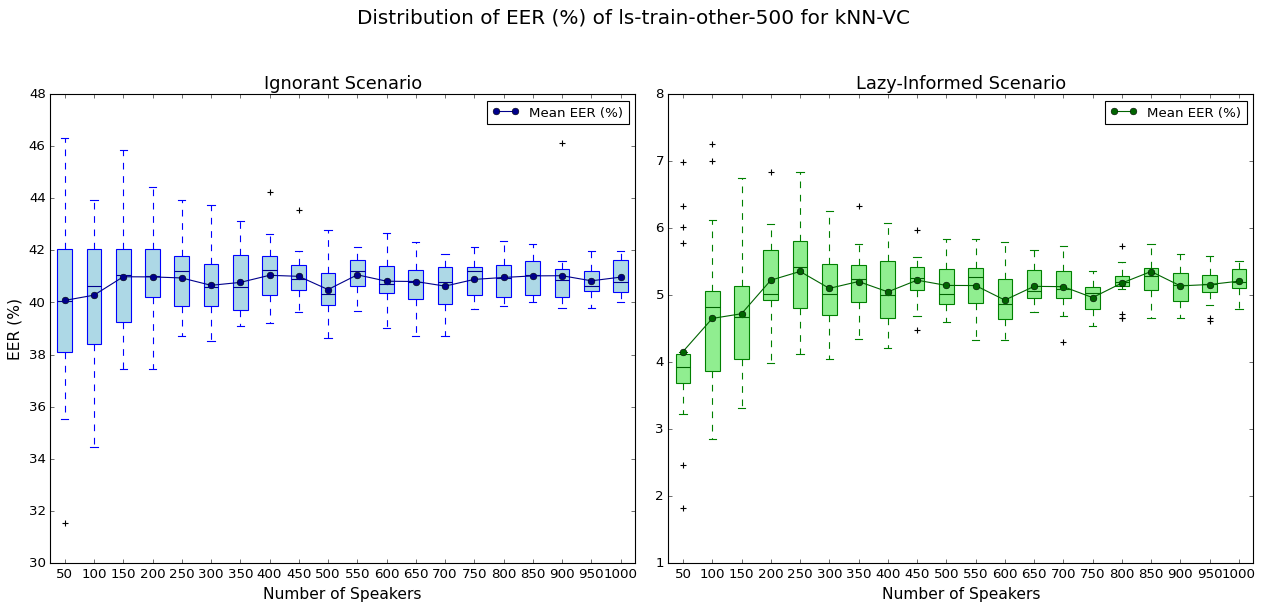

In [35]:
# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 8), facecolor='white')

# Customizing the overall appearance
plt.suptitle('Distribution of EER (%) of ls-train-other-500 for kNN-VC', fontsize=18, fontweight='normal')

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_speakers')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_speakers')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index, patch_artist=True, 
               boxprops=dict(facecolor='lightblue', color='blue'),
               medianprops=dict(color='darkblue'),
               whiskerprops=dict(color='blue'),
               capprops=dict(color='blue'))
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='darkblue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario', fontsize=16, fontweight='normal')
axs[0].set_xlabel('Number of Speakers', fontsize=14)
axs[0].set_ylabel('EER (%)', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_speakers')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_speakers')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index, patch_artist=True, 
               boxprops=dict(facecolor='lightgreen', color='green'),
               medianprops=dict(color='darkgreen'),
               whiskerprops=dict(color='green'),
               capprops=dict(color='green'))
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='darkgreen', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Lazy-Informed Scenario', fontsize=16, fontweight='normal')
axs[1].set_xlabel('Number of Speakers', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('overal_stats/knnvc_to500_speakes.png')
plt.savefig('overal_stats/knnvc_to500_speakes.pdf')  

plt.show()